# K邻近算法示例学习

示例数据来源: https://www.manning.com/books/machine-learning-in-action


### 1、实战背景

海伦女士一直使用在线约会网站寻找适合自己的约会对象。尽管约会网站会推荐不同的任选，但她并不是喜欢每一个人。经过一番总结，她发现自己交往过的人可以进行如下分类：

1. 不喜欢的人
2. 魅力一般的人
3. 极具魅力的人
       
海伦收集约会数据已经有了一段时间，她把这些数据存放在文本文件datingTestSet.txt中，每个样本数据占据一行，总共有1000行。datingTestSet.txt数据下载： 数据集下载

海伦收集的样本数据主要包含以下3种特征：

1. 每年获得的飞行常客里程数
2. 玩视频游戏所消耗时间百分比
3. 每周消费的冰淇淋公升数

数据集`datingTestSet.txt`内容如下：

```
40920	8.326976	0.953952	largeDoses
14488	7.153469	1.673904	smallDoses
26052	1.441871	0.805124	didntLike
75136	13.147394	0.428964	didntLike
38344	1.669788	0.134296	didntLike
72993	10.141740	1.032955	didntLike
...
```

### 1、数据处理

In [5]:
import numpy as np

'''
函数说明:打开并解析文件，对数据进行分类：1代表不喜欢,2代表魅力一般,3代表极具魅力
 
Parameters:
    filename - 文件名
Returns:
    returnMat - 特征矩阵
    classLabelVector - 分类Label向量
'''
def file2matrix(filename):
    fr = open(filename)
    arrayOLines = fr.readlines()
    numberOfLines = len(arrayOLines)
    returnMat = np.zeros((numberOfLines, 3))
    # print(returnMat)
    classLabelVector = []
    index = 0
    for line in arrayOLines:
        # 删除空白符
        line = line.strip()
        # 利用'\t'行数据切分
        listFormLine = line.split('\t')
        # 将前三列提取出来，存放到特征矩阵中
        returnMat[index,:] = listFormLine[0:3]
        # 将文本标签分类，并用数字替换
        if listFormLine[-1] == 'didntLike':
            classLabelVector.append(1)
        elif listFormLine[-1] == 'smallDoses':
            classLabelVector.append(2)
        elif listFormLine[-1] == 'largeDoses':
            classLabelVector.append(3)
        index += 1
    
    return returnMat, classLabelVector

### 2、分析数据，并将数据可视化

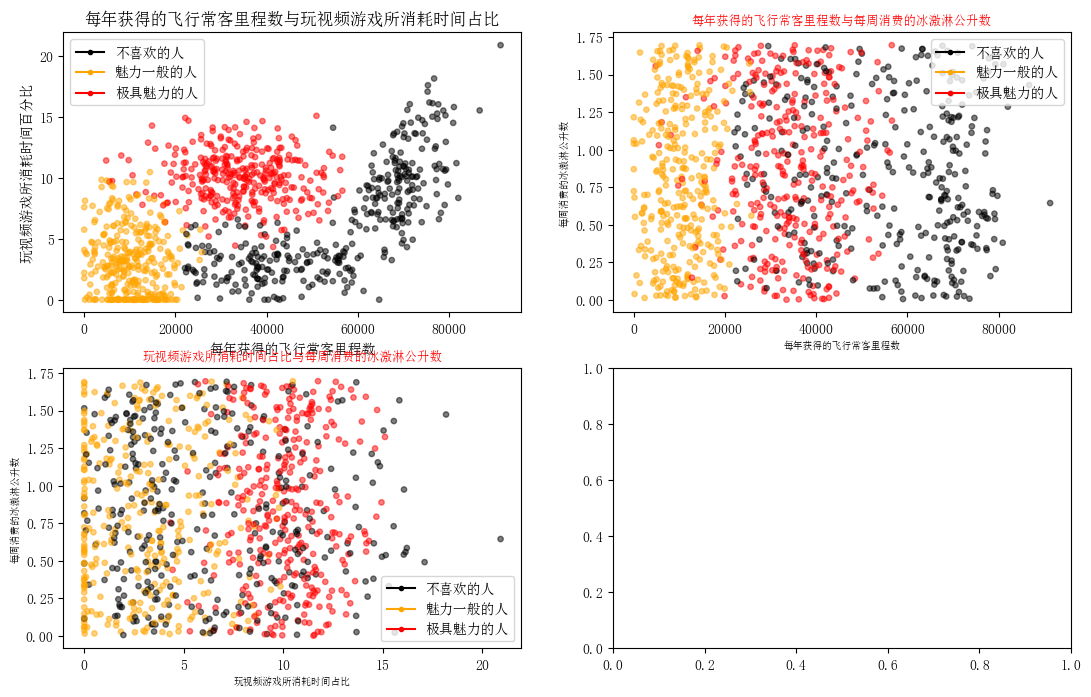

In [19]:
from matplotlib.font_manager import FontProperties
import matplotlib.lines as mlines
import matplotlib.pyplot as plt

'''
函数说明:可视化数据
 
Parameters:
    datingDataMat - 特征矩阵
    datingLabels - 分类Label
Returns:
    无
'''
def showData(datingDataMat, datingLabels):
    # 设置汉字格式
    # font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14)
    # 新版本设置方式
    # plt.rcParams['font.family'] = ['SimHei']
    plt.rcParams['font.family'] = ['simsun']
    plt.rcParams['axes.unicode_minus']=False

    # 将画布fig分隔成1行1列，不共享x轴和y轴，fig画布的大小为（13, 8)
    # 当nrow=2,nclos=2时,代表fig画布被分为四个区域,axs[0][0]表示第一行第一个区域
    fig, axs = plt.subplots(nrows=2, ncols= 2, sharex=False, sharey=False, figsize=(13,8))

    numberOfLables = len(datingLabels)
    LabelsColors = []
    for i in datingLabels:
        if i == 1:
            LabelsColors.append('black')
        elif i == 2:
            LabelsColors.append('orange')
        elif i == 3:
            LabelsColors.append('red')
    
    # 画出散点图,以datingDataMat矩阵的第一(飞行常客例程)、第二列(玩游戏)数据画散点数据,散点大小为15,透明度为0.5
    axs[0][0].scatter(x = datingDataMat[:,0], y=datingDataMat[:,1], color=LabelsColors,s=15, alpha=.5)
    axs0_title_text = axs[0][0].set_title(u'每年获得的飞行常客里程数与玩视频游戏所消耗时间占比')
    axs0_xlabel_text = axs[0][0].set_xlabel(u'每年获得的飞行常客里程数')
    axs0_ylabel_text = axs[0][0].set_ylabel(u'玩视频游戏所消耗时间百分比')

    # 画出散点图,以datingDataMat矩阵的第一(飞行常客例程)、第三列(冰激凌)数据画散点数据,散点大小为15,透明度为0.5
    axs[0][1].scatter(x=datingDataMat[:, 0], y=datingDataMat[:, 2], color=LabelsColors, s=15, alpha=.5)
    # 设置标题,x轴label,y轴label
    axs1_title_text = axs[0][1].set_title(u'每年获得的飞行常客里程数与每周消费的冰激淋公升数')
    axs1_xlabel_text = axs[0][1].set_xlabel(u'每年获得的飞行常客里程数')
    axs1_ylabel_text = axs[0][1].set_ylabel(u'每周消费的冰激淋公升数')
    plt.setp(axs1_title_text, size=9, weight='bold', color='red')
    plt.setp(axs1_xlabel_text, size=7, weight='bold', color='black')
    plt.setp(axs1_ylabel_text, size=7, weight='bold', color='black')

    # 画出散点图,以datingDataMat矩阵的第二(玩游戏)、第三列(冰激凌)数据画散点数据,散点大小为15,透明度为0.5
    axs[1][0].scatter(x=datingDataMat[:, 1], y=datingDataMat[:, 2], color=LabelsColors, s=15, alpha=.5)
    # 设置标题,x轴label,y轴label
    axs2_title_text = axs[1][0].set_title(u'玩视频游戏所消耗时间占比与每周消费的冰激淋公升数')
    axs2_xlabel_text = axs[1][0].set_xlabel(u'玩视频游戏所消耗时间占比')
    axs2_ylabel_text = axs[1][0].set_ylabel(u'每周消费的冰激淋公升数')
    plt.setp(axs2_title_text, size=9, weight='bold', color='red')
    plt.setp(axs2_xlabel_text, size=7, weight='bold', color='black')
    plt.setp(axs2_ylabel_text, size=7, weight='bold', color='black')
    # 设置图例
    didntLike = mlines.Line2D([], [], color='black', marker='.', markersize=6, label=u'不喜欢的人')
    smallDoses = mlines.Line2D([], [], color='orange', marker='.', markersize=6, label=u'魅力一般的人')
    largeDoses = mlines.Line2D([], [], color='red', marker='.', markersize=6, label=u'极具魅力的人')
    # 添加图例
    axs[0][0].legend(handles=[didntLike, smallDoses, largeDoses])
    axs[0][1].legend(handles=[didntLike, smallDoses, largeDoses])
    axs[1][0].legend(handles=[didntLike, smallDoses, largeDoses])
    # 显示图片
    plt.show()


### 3、数据归一化

从上面的可视化数据图像中已经可以看出一些特征了，从更通俗的意义上说，就是某些类别在某些属性上有了相当的聚集性或倾向性，这样也就方便对数据进行分类了。但是它还不能直接被处理，问题在于各种不同属性（“每年获得的飞行常客里程数”、“玩视频游戏所消耗时间占比”、“每周消耗的冰琪淋公升数”）在数值上差异太大。这样就会导致在计算样本“距离”的时候，数值上较大的属性将主导结果倾向。欧式距离公式：$$\sqrt{(x1-x2)^2 + (y1-y2)^2 + (z1-z2)^2}$$

因此，在处理不同取值范围的特征值时，通常采用的方法是数值归一化。如将取值范围处理为 $[0,1] 或 [-1,1]$.下面的公式可以将任意取值范围的特征值转化为０到１区间内的值：$$newValue = (oldValue - min) / (max - min)$$

同样地，很可以很容易地联想到，当海伦对某些“属性”更具偏好时则可以给相应的属性加上权重。

In [20]:
'''
函数说明:对数据进行归一化
 
Parameters:
    dataSet - 特征矩阵
Returns:
    normDataSet - 归一化后的特征矩阵
    ranges - 数据范围
    minVals - 数据最小值
'''
def autoNorm(dataSet):
    # 获得数据的最小值
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    # 最大值和最小值的范围
    ranges = maxVals - minVals
    # shape(dataSet)返回dataSet的矩阵行列数
    normDataSet = np.zeros(np.shape(dataSet))
    # 返回dataSet的行数
    m = dataSet.shape[0]
    # 原始值减去最小值
    normDataSet = dataSet - np.tile(minVals,(m,1))
    # 除以最大和最小值的差,得到归一化数据
    normDataSet = normDataSet / np.tile(ranges,(m,1))
    # 返回归一化数据结果,数据范围,最小值
    return normDataSet,ranges,minVals

if __name__ == '__main__':
    # 打开的文件名
    filename = "datingTestSet.txt"
    # 打开并处理数据
    datingDataMat, datingLabels = file2matrix(filename)
    normDataSet, ranges, minVals = autoNorm(datingDataMat)
    print(normDataSet)
    print(ranges)
    print(minVals)

[[0.44832535 0.39805139 0.56233353]
 [0.15873259 0.34195467 0.98724416]
 [0.28542943 0.06892523 0.47449629]
 ...
 [0.29115949 0.50910294 0.51079493]
 [0.52711097 0.43665451 0.4290048 ]
 [0.47940793 0.3768091  0.78571804]]
[9.1273000e+04 2.0919349e+01 1.6943610e+00]
[0.       0.       0.001156]


### 4、测试算法：验证分类器
